In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
insurance_data = pd.read_csv("./insurance.csv")

In [4]:
insurance_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [19]:
insurance_data.describe(include = 'all')


age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422265  
std     12110.011237  
min      1121.873900  
25%      4740.287150  
50%      9382.033000  
75%     16639.912515  
max     63770.428010

C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

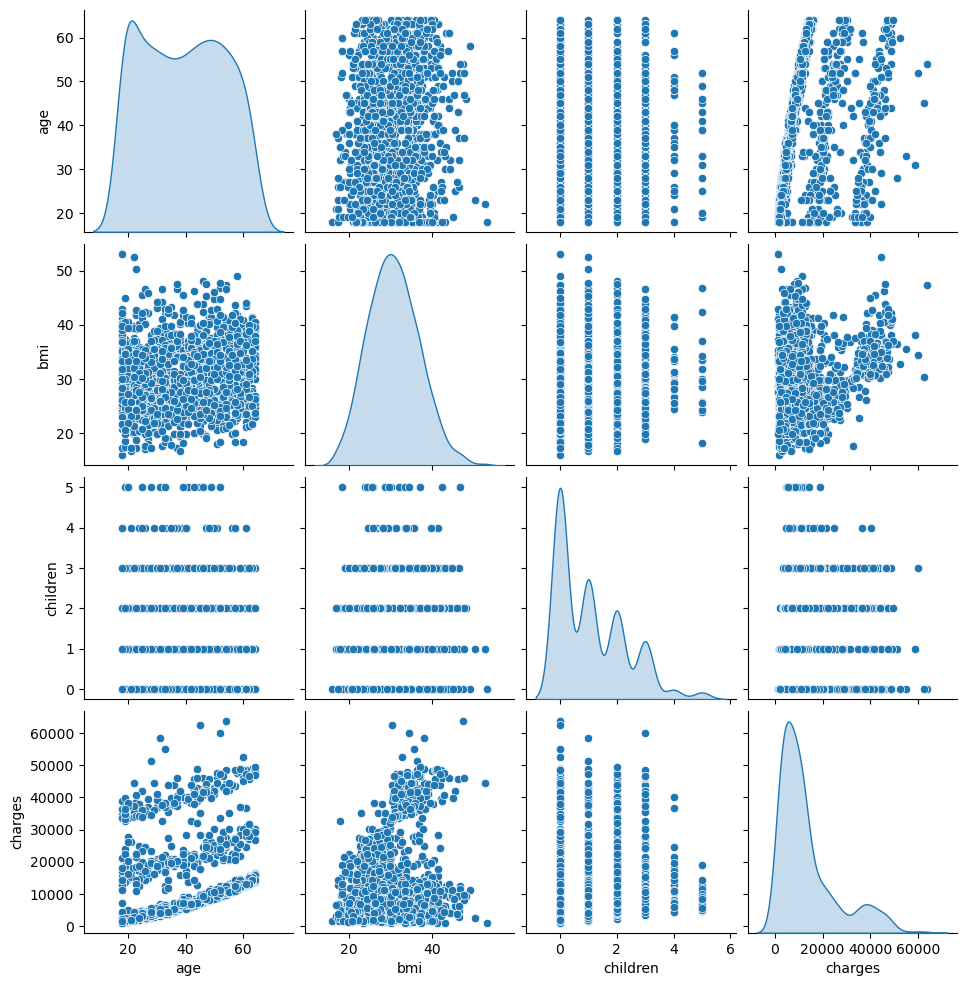

In [10]:
sns.pairplot(insurance_data[['age','bmi','children','charges']], diag_kind = 'kde')

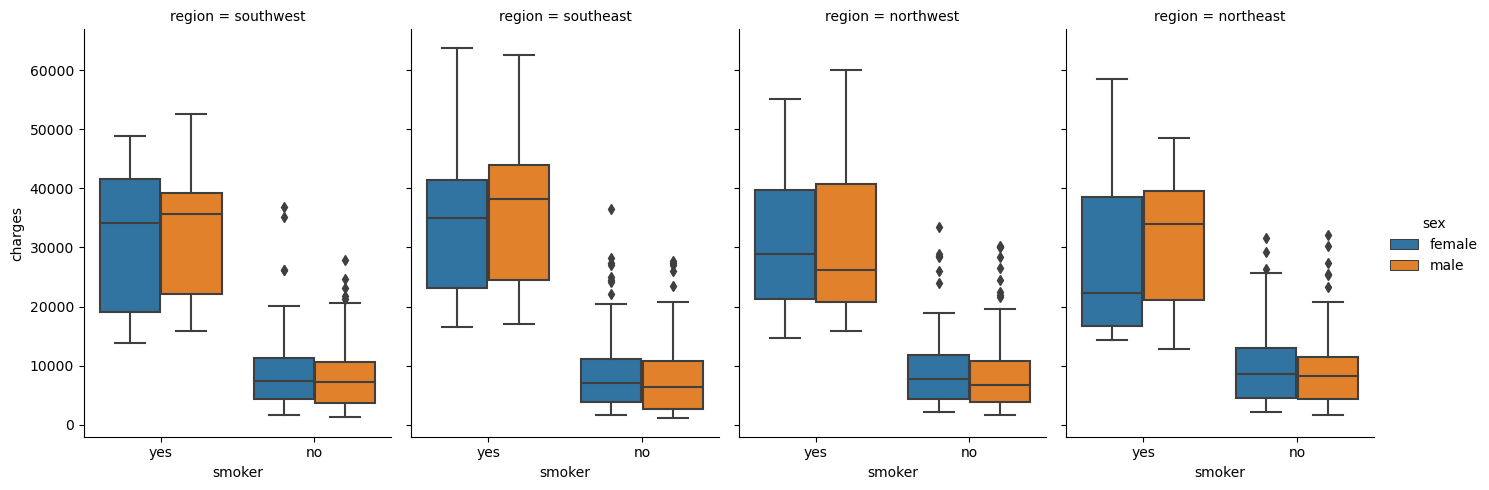

In [16]:
sns.catplot(x= 'smoker', y = 'charges', hue='sex',col = 'region', aspect= .7, kind = 'box' , data= insurance_data)

<Axes: xlabel='age', ylabel='charges'>

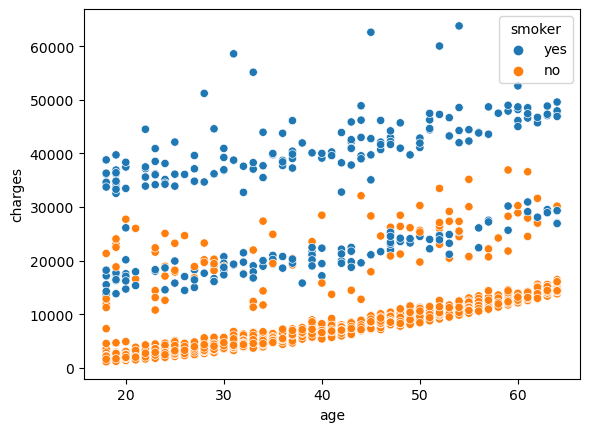

In [21]:
sns.scatterplot(x='age', y='charges' , data=insurance_data, hue ='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

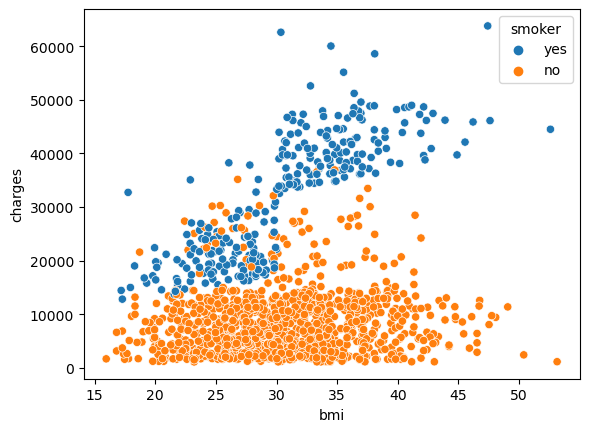

In [28]:
sns.scatterplot(x='bmi', y = 'charges', hue='smoker', data=insurance_data)

In [47]:
df = insurance_data.copy()
#create obese feature
df['obese'] = df['bmi'].map(lambda x: 1 if x> 30 else 0)

# Encode the sex and smoker columns
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Create the obese_smoker feature
df['obese_smoker'] = df.apply(
    lambda r: 'not-obese-non-smoker' if (r['smoker'] == 0) & (r['obese'] == 0) else (
        'obese-smoker' if (r['smoker'] == 1) & (r['obese'] == 1) else (
            'obese-non-smoker' if (r['smoker'] == 0) & (r['obese'] == 1) else 'not-obese-smoker'
        )
    ), axis=1
)

df  












age  sex     bmi  children  smoker     region      charges  obese  \
0      19    0  27.900         0       1  southwest  16884.92400      0   
1      18    1  33.770         1       0  southeast   1725.55230      1   
2      28    1  33.000         3       0  southeast   4449.46200      1   
3      33    1  22.705         0       0  northwest  21984.47061      0   
4      32    1  28.880         0       0  northwest   3866.85520      0   
...   ...  ...     ...       ...     ...        ...          ...    ...   
1333   50    1  30.970         3       0  northwest  10600.54830      1   
1334   18    0  31.920         0       0  northeast   2205.98080      1   
1335   18    0  36.850         0       0  southeast   1629.83350      1   
1336   21    0  25.800         0       0  southwest   2007.94500      0   
1337   61    0  29.070         0       1  northwest  29141.36030      0   

              obese_smoker  
0         not-obese-smoker  
1         obese-non-smoker  
2         obese-non-smoker  
3     not-obese-non-smoker  
4     not-obese-non-smoker  
...                    ...  
1333      obese-non-smoker  
1334      obese-non-smoker  
1335      obese-non-smoker  
1336  not-obese-non-smoker  
1337      not-obese-smoker  

[1338 rows x 9 columns]

<Axes: xlabel='age', ylabel='charges'>

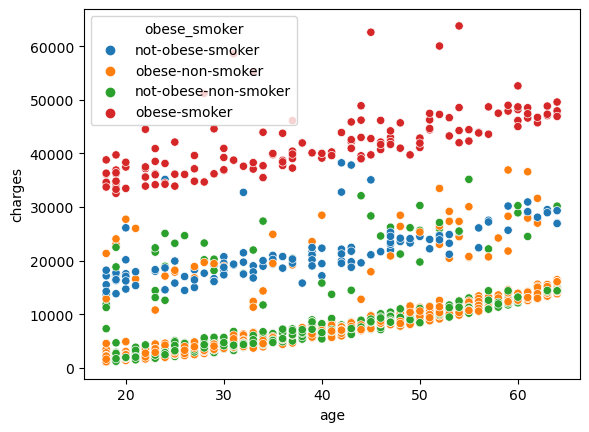

In [44]:
sns.scatterplot(x='age', y='charges', hue='obese_smoker', data= df)

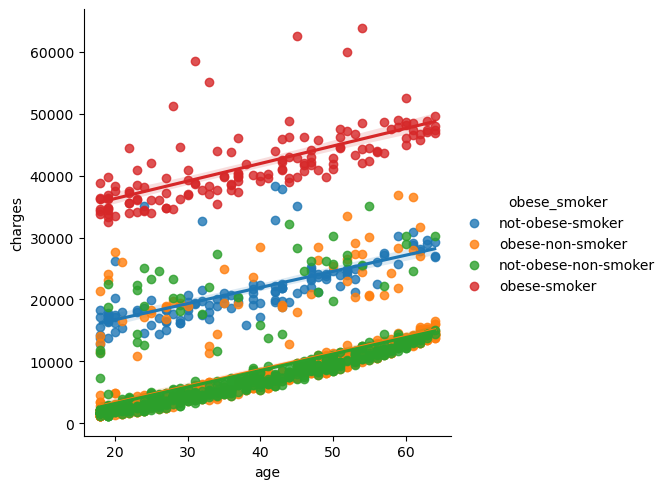

In [45]:
sns.lmplot(data = df, x='age', y='charges', hue='obese_smoker')

In [48]:
df = pd.get_dummies(df, columns=['region'])
df = pd.get_dummies(df, columns=['obese_smoker'])
df

age  sex     bmi  children  smoker      charges  obese  \
0      19    0  27.900         0       1  16884.92400      0   
1      18    1  33.770         1       0   1725.55230      1   
2      28    1  33.000         3       0   4449.46200      1   
3      33    1  22.705         0       0  21984.47061      0   
4      32    1  28.880         0       0   3866.85520      0   
...   ...  ...     ...       ...     ...          ...    ...   
1333   50    1  30.970         3       0  10600.54830      1   
1334   18    0  31.920         0       0   2205.98080      1   
1335   18    0  36.850         0       0   1629.83350      1   
1336   21    0  25.800         0       0   2007.94500      0   
1337   61    0  29.070         0       1  29141.36030      0   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                False             False             False              True   
1                False             False              True             False   
2                False             False              True             False   
3                False              True             False             False   
4                False              True             False             False   
...                ...               ...               ...               ...   
1333             False              True             False             False   
1334              True             False             False             False   
1335             False             False              True             False   
1336             False             False             False              True   
1337             False              True             False             False   

      obese_smoker_not-obese-non-smoker  obese_smoker_not-obese-smoker  \
0                                 False                           True   
1                                 False                          False   
2                                 False                          False   
3                                  True                          False   
4                                  True                          False   
...                                 ...                            ...   
1333                              False                          False   
1334                              False                          False   
1335                              False                          False   
1336                               True                          False   
1337                              False                           True   

      obese_smoker_obese-non-smoker  obese_smoker_obese-smoker  
0                             False                      False  
1                              True                      False  
2                              True                      False  
3                             False                      False  
4                             False                      False  
...                             ...                        ...  
1333                           True                      False  
1334                           True                      False  
1335                           True                      False  
1336                          False                      False  
1337                          False                      False  

[1338 rows x 15 columns]

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [58]:
def make_models (df):
    train_dataset = df.sample(frac=0.8 , random_state= 99)
    test_dataset = df.drop(train_dataset.index)
    
    train_labels = train_dataset.pop('charges')
    test_labels = test_dataset.pop('charges')
    
    normalizer = tf.keras.layers.Normalization(axis = -1)
    normalizer.adapt(np.array(train_dataset))
    
    linear_model = tf.keras.Sequential([normalizer , layers.Dense(units=1)])
    
    linear_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='mean_absolute_error', metrics=['MeanAbsoluteError'])
    
    # setting up deep neural network model
    dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
      ])

    dnn_model.compile(loss='mean_absolute_error', metrics=['MeanAbsoluteError'], optimizer=tf.keras.optimizers.Adam(0.001))

    def train_and_evaluate_model(model):
        # training model using train set
        history = model.fit(
            train_dataset,
            train_labels,
            epochs=100,
            verbose=0,
            # Calculate validation results on 20% of the training data.
            validation_split = 0.2)
        
        # model evaluation and prediction using test set
        loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)
        
        test_predictions = model.predict(test_dataset).flatten()

        # plot predictions
        a = plt.axes(aspect='equal')
        plt.scatter(test_labels, test_predictions)
        plt.xlabel('True values (charges)')
        plt.ylabel('Predictions (charges)')
        lims = [0, 50000]
        plt.xlim(lims)
        plt.ylim(lims)
        _ = plt.plot(lims,lims)
        plt.show()
        
    print('linear model')
    train_and_evaluate_model(linear_model)
    print('dnn model')
    train_and_evaluate_model(dnn_model)



linear model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 13028.9980 - loss: 13028.9980
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


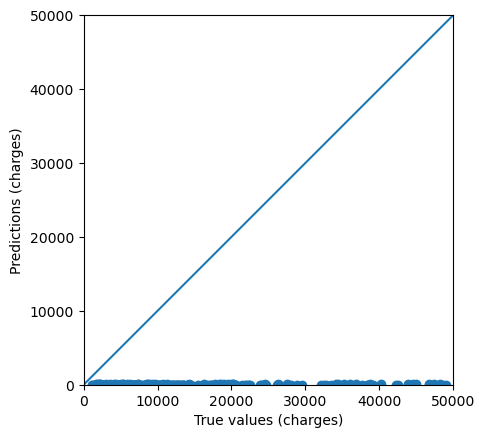

dnn model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 3069.9089 - loss: 3069.9089
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


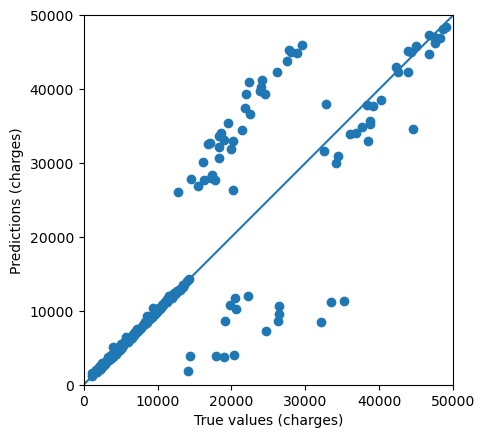

In [59]:
df_original_features=df[['age','sex','bmi','children','smoker','charges','region_northeast','region_northwest','region_southeast','region_southwest']]
make_models(df_original_features)

linear model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 13029.0615 - loss: 13029.0615
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


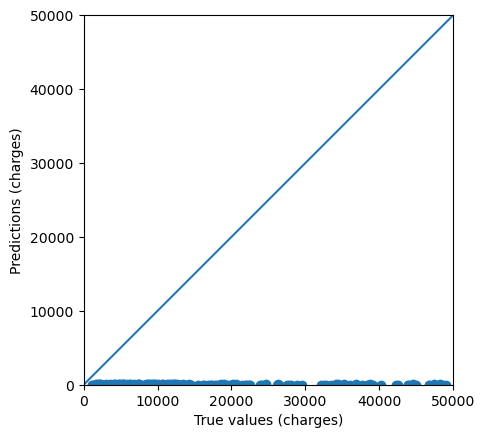

dnn model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 2242.8267 - loss: 2242.8267
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


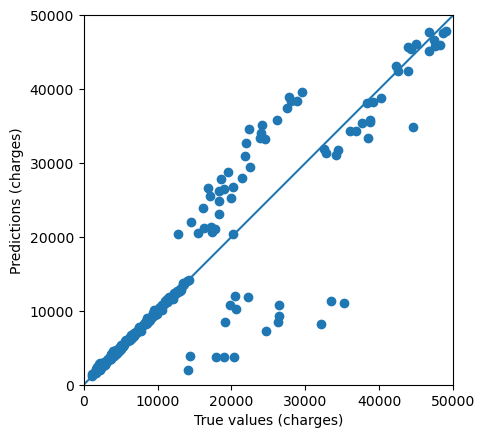

In [60]:
df_add_obese=df[['age','sex','bmi','children','smoker','charges','region_northeast','region_northwest','region_southeast','region_southwest', 'obese']]
make_models(df_add_obese)

linear model
9/9 - 0s - 10ms/step - MeanAbsoluteError: 13028.8545 - loss: 13028.8545
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


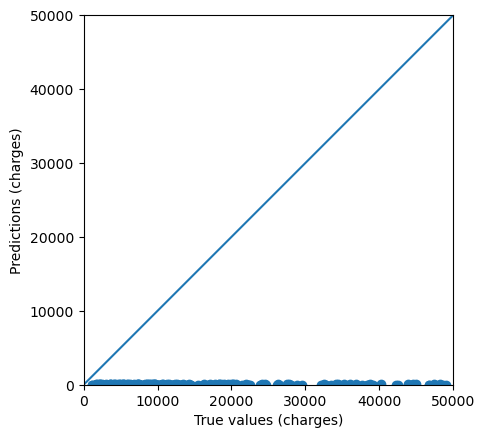

dnn model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 1259.9052 - loss: 1259.9052
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


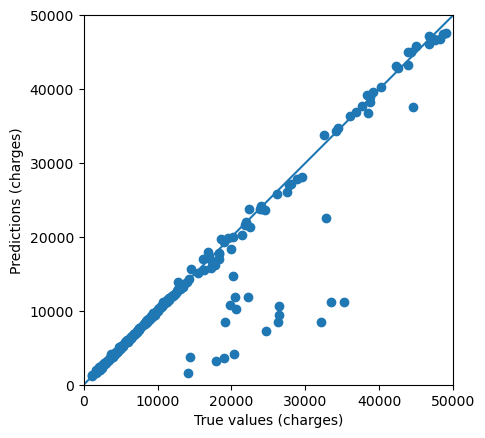

In [61]:
make_models(df)

linear model
9/9 - 0s - 10ms/step - MeanAbsoluteError: 13028.9434 - loss: 13028.9434
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


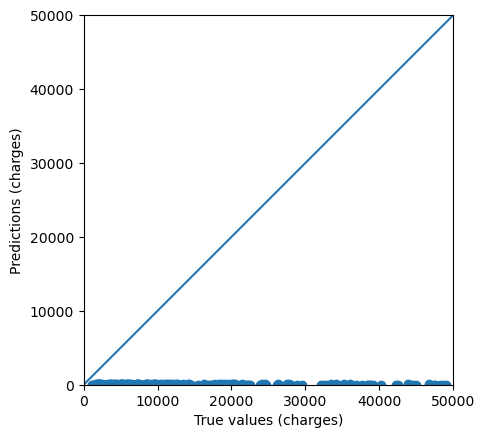

dnn model
9/9 - 0s - 9ms/step - MeanAbsoluteError: 1321.8186 - loss: 1321.8186
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


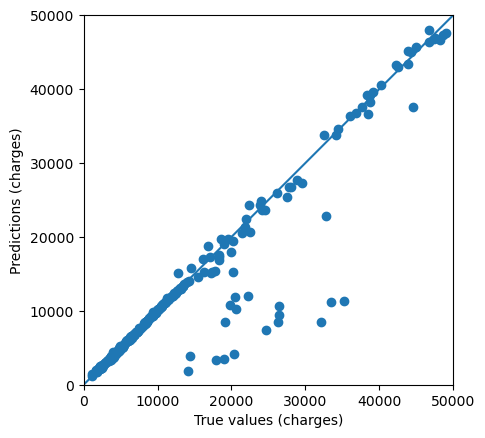

In [62]:
df_drop_obsoletes=df.drop(['smoker','obese'], axis=1)
make_models(df_drop_obsoletes)

linear model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 13029.0244 - loss: 13029.0244
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


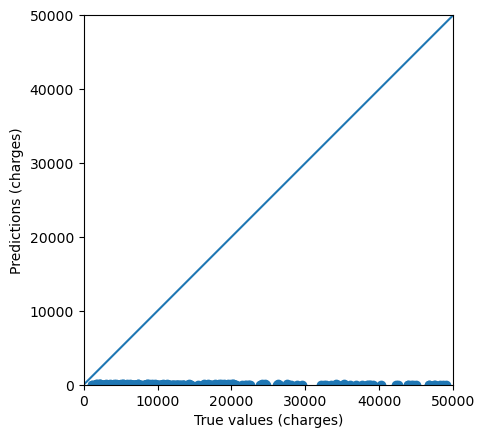

dnn model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 1314.8948 - loss: 1314.8948
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


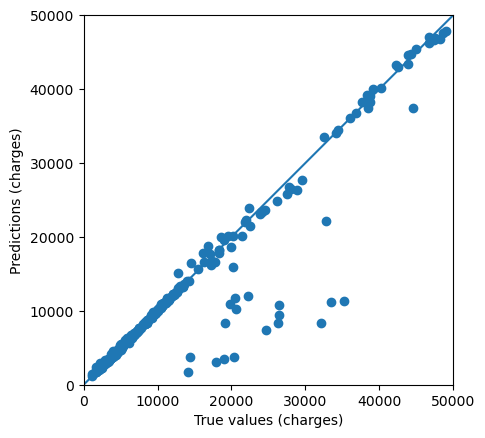

In [63]:
df_drop_more=df.drop(['smoker','obese','region_northeast','obese_smoker_not-obese-non-smoker'], axis=1)
make_models(df_drop_more)

linear model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 13029.0469 - loss: 13029.0469
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


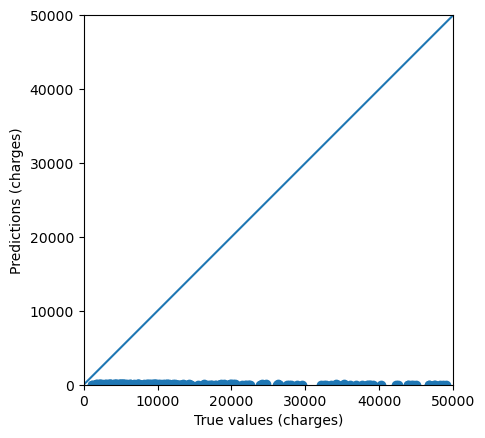

dnn model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 1363.4440 - loss: 1363.4440
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


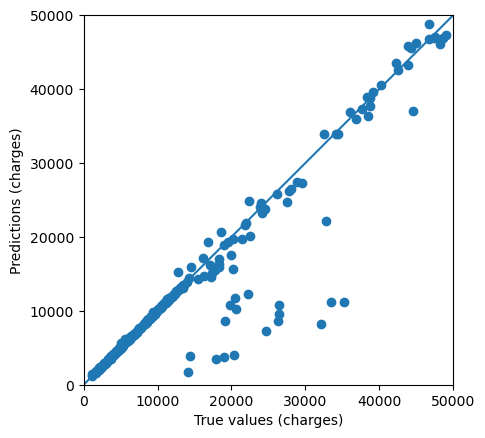

In [64]:
df_drop_more2=df.drop(['obese','smoker','obese_smoker_obese-non-smoker','obese_smoker_not-obese-non-smoker'], axis=1)
make_models(df_drop_more2)

linear model
9/9 - 0s - 8ms/step - MeanAbsoluteError: 13028.9658 - loss: 13028.9658
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


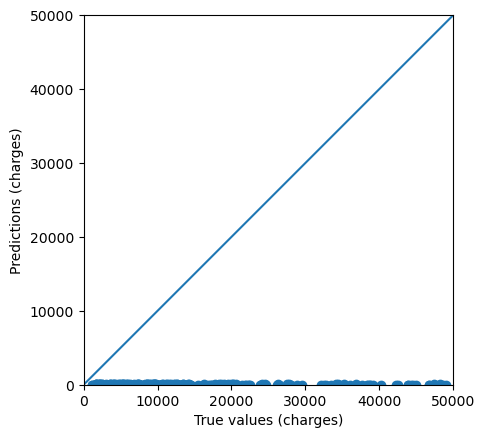

dnn model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 1252.0873 - loss: 1252.0873
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


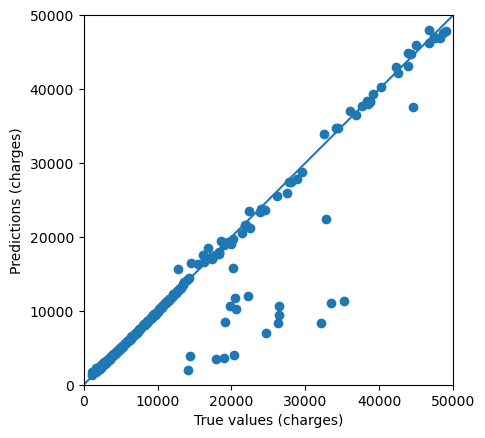

In [65]:
df_age_replaced_by_squared=df.copy()
df_age_replaced_by_squared['age']=df_age_replaced_by_squared['age'].transform(lambda x: x*x)
make_models(df_age_replaced_by_squared)

linear model
9/9 - 0s - 7ms/step - MeanAbsoluteError: 13029.0000 - loss: 13029.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


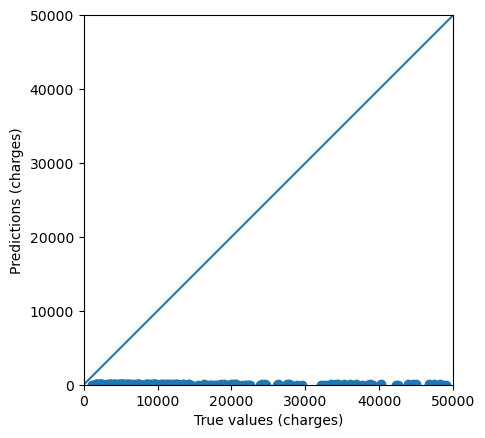

dnn model
9/9 - 0s - 12ms/step - MeanAbsoluteError: 1264.8203 - loss: 1264.8203
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


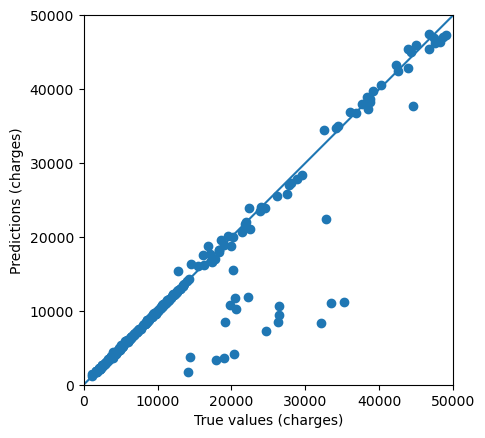

In [66]:
df_add_age_squared=df.copy()
df_add_age_squared['age_squared']=df_add_age_squared['age'].transform(lambda x: x*x)
make_models(df_add_age_squared)